In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Default figure size
plt.rcParams['figure.dpi'] = 100 # Adjust for higher resolution plots

In [2]:
# Path to your data file
data_file_path = '../data/city_day.csv'

try:
    df = pd.read_csv(data_file_path)
    print("Data loaded successfully!")
    print(f"Shape of the dataset: {df.shape}")
except FileNotFoundError:
    print(f"Error: The file '{data_file_path}' was not found.")
    print("Please ensure the CSV file is in the 'data/' folder and the path is correct.")
    print("Also, double-check the filename for typos.")
    df = pd.DataFrame() # Create an empty DataFrame to prevent errors in subsequent cells

Data loaded successfully!
Shape of the dataset: (29531, 16)


In [3]:
if not df.empty:
    print("\n--- First 5 rows of the dataset ---")
    print(df.head())

    print("\n--- Last 5 rows of the dataset ---")
    print(df.tail())

    print("\n--- Dataset Information ---")
    df.info()

    print("\n--- Statistical Summary ---")
    # For numerical columns
    print(df.describe())
    # For categorical/object columns (if any, like 'City')
    print("\n--- Statistical Summary for Object/Categorical Columns ---")
    print(df.describe(include='object'))

    print("\n--- Column Names and Data Types ---")
    print(df.dtypes)
else:
    print("DataFrame is empty. Cannot perform initial inspection.")


--- First 5 rows of the dataset ---
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  

--- Last 5 rows of the dataset ---
                City        Date  PM2.5   PM10    NO    NO2    NOx    NH3  \
29526  Visakhapatnam  2020-06-27  15.02


--- Missing Values Count ---
Xylene        18109
PM10          11140
NH3           10328
Toluene        8041
Benzene        5623
AQI            4681
AQI_Bucket     4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
dtype: int64

--- Percentage of Missing Values ---
Xylene        61.322001
PM10          37.723071
NH3           34.973418
Toluene       27.229014
Benzene       19.041008
AQI           15.851139
AQI_Bucket    15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
dtype: float64


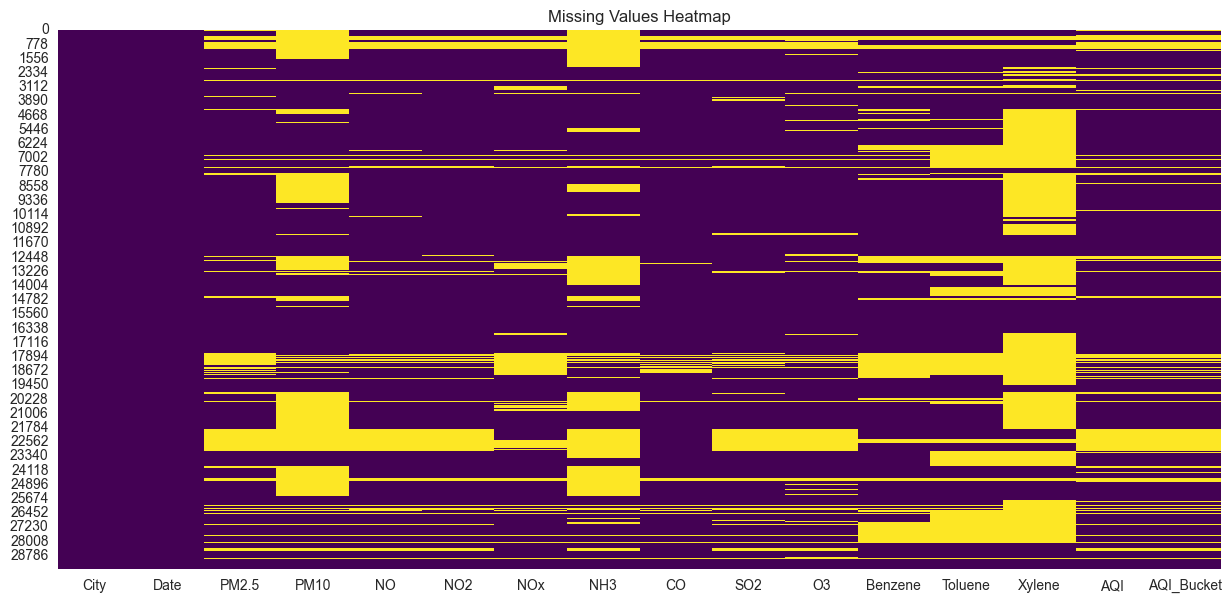

In [4]:
if not df.empty:
    print("\n--- Missing Values Count ---")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0].sort_values(ascending=False))

    print("\n--- Percentage of Missing Values ---")
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

    # Optional: Visualize missing values
    plt.figure(figsize=(15, 7))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()
else:
    print("DataFrame is empty. Cannot check for missing values.")

In [5]:
if not df.empty:
    # Convert 'Date' column to datetime
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        # Set 'Date' as index for time series analysis
        df.set_index('Date', inplace=True)
        print("Date column converted to datetime and set as index.")
    else:
        print("Warning: 'Date' column not found. Cannot set as index.")

    # Handle missing values (Strategy: Imputation or Removal)
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

    if 'City' in df.columns:
        df_cleaned = df.groupby('City')[numerical_cols].ffill().bfill()
        df_cleaned['City'] = df['City']
        print("\nMissing numerical values filled by forward and backward fill, grouped by city.")
    else:
        df_cleaned = df.ffill().bfill()
        print("\nMissing numerical values filled by forward and backward fill (no city grouping).")

    # Check missing values again after imputation
    print("\n--- Missing Values Count after Imputation ---")
    print(df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0])

    print("\n--- Cleaned Dataset Information ---")
    df_cleaned.info()
else:
    print("DataFrame is empty. Cannot perform data cleaning.")

Date column converted to datetime and set as index.

Missing numerical values filled by forward and backward fill, grouped by city.

--- Missing Values Count after Imputation ---
Series([], dtype: int64)

--- Cleaned Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29531 entries, 2015-01-01 to 2020-07-01
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    29531 non-null  float64
 1   PM10     29531 non-null  float64
 2   NO       29531 non-null  float64
 3   NO2      29531 non-null  float64
 4   NOx      29531 non-null  float64
 5   NH3      29531 non-null  float64
 6   CO       29531 non-null  float64
 7   SO2      29531 non-null  float64
 8   O3       29531 non-null  float64
 9   Benzene  29531 non-null  float64
 10  Toluene  29531 non-null  float64
 11  Xylene   29531 non-null  float64
 12  AQI      29531 non-null  float64
 13  City     29531 non-null  object 
dtypes: float64(13), obje


Filtered data for Delhi. Shape: (2009, 14)


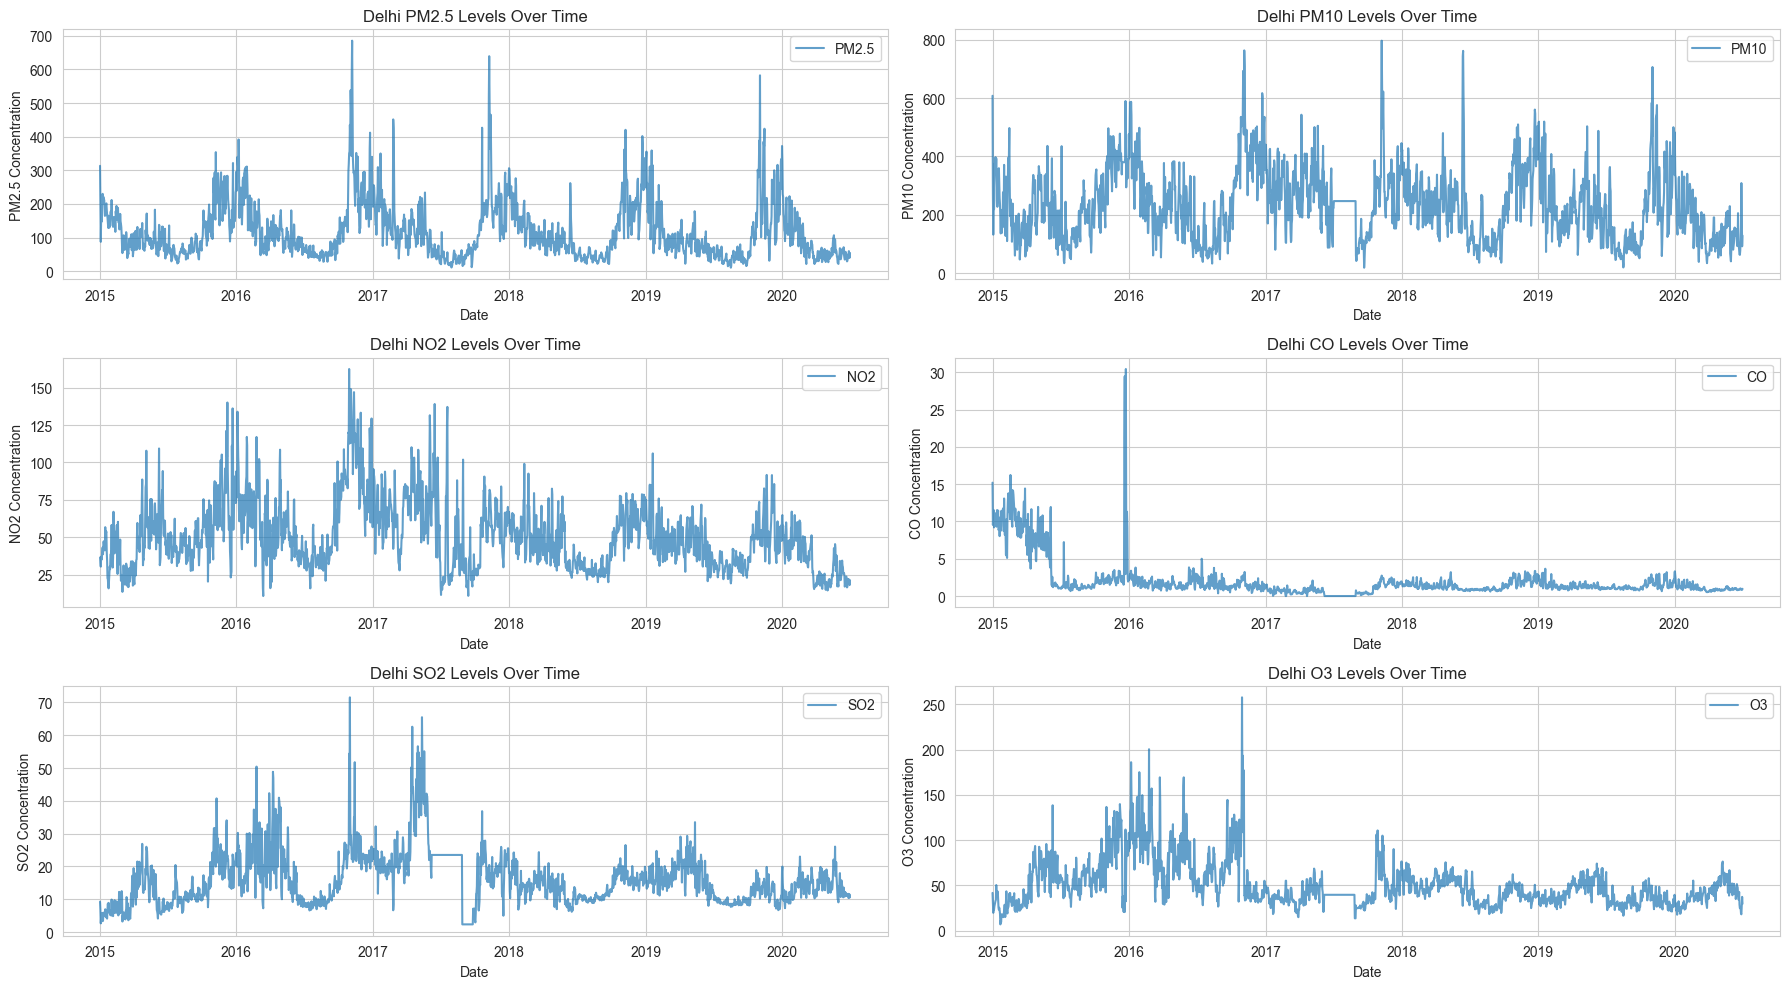


--- Correlation Matrix for Delhi Pollutants ---


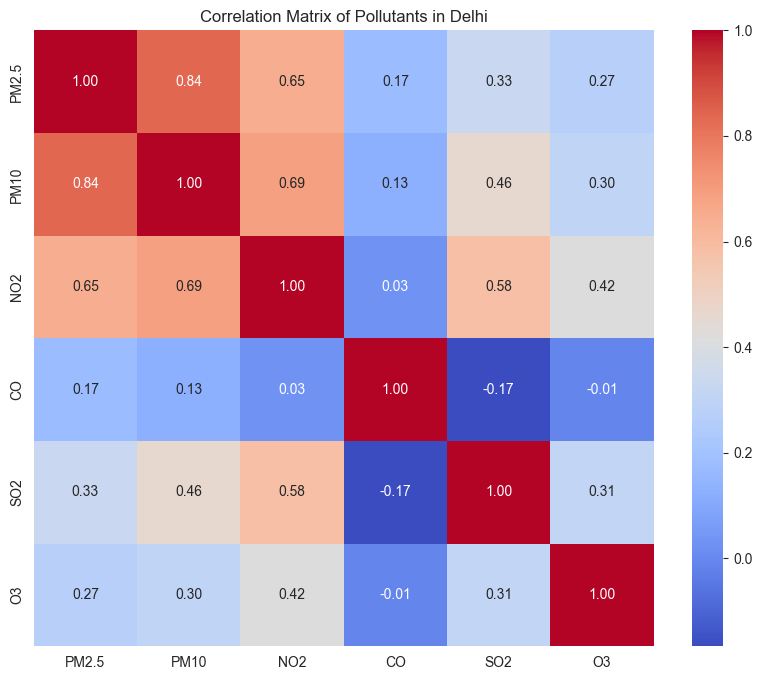

In [6]:
if not df.empty and 'City' in df.columns:
    # Filter data for Delhi
    delhi_df = df_cleaned[df_cleaned['City'] == 'Delhi'].copy()
    print(f"\nFiltered data for Delhi. Shape: {delhi_df.shape}")

    if not delhi_df.empty:
        # Plot time series of key pollutants for Delhi
        pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']
        plt.figure(figsize=(18, 10))
        for i, pollutant in enumerate(pollutants):
            if pollutant in delhi_df.columns:
                plt.subplot(3, 2, i + 1)
                plt.plot(delhi_df.index, delhi_df[pollutant], label=pollutant, alpha=0.7)
                plt.title(f'Delhi {pollutant} Levels Over Time')
                plt.xlabel('Date')
                plt.ylabel(f'{pollutant} Concentration')
                plt.legend()
                plt.tight_layout()
            else:
                print(f"Warning: {pollutant} column not found in Delhi data.")
        plt.show()

        # Correlation Matrix (for Delhi data)
        print("\n--- Correlation Matrix for Delhi Pollutants ---")
        plt.figure(figsize=(10, 8))
        sns.heatmap(delhi_df[pollutants].corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix of Pollutants in Delhi')
        plt.show()
    else:
        print("No data found for Delhi after filtering.")
else:
    print("DataFrame is empty or 'City' column not found. Cannot perform Delhi-specific analysis.")

In [7]:
print("--- Data Types of Cleaned DataFrame ---")
print(df_cleaned.dtypes)

print("\n--- Missing Values Count in Cleaned DataFrame ---")
print(df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0])

--- Data Types of Cleaned DataFrame ---
PM2.5      float64
PM10       float64
NO         float64
NO2        float64
NOx        float64
NH3        float64
CO         float64
SO2        float64
O3         float64
Benzene    float64
Toluene    float64
Xylene     float64
AQI        float64
City        object
dtype: object

--- Missing Values Count in Cleaned DataFrame ---
Series([], dtype: int64)


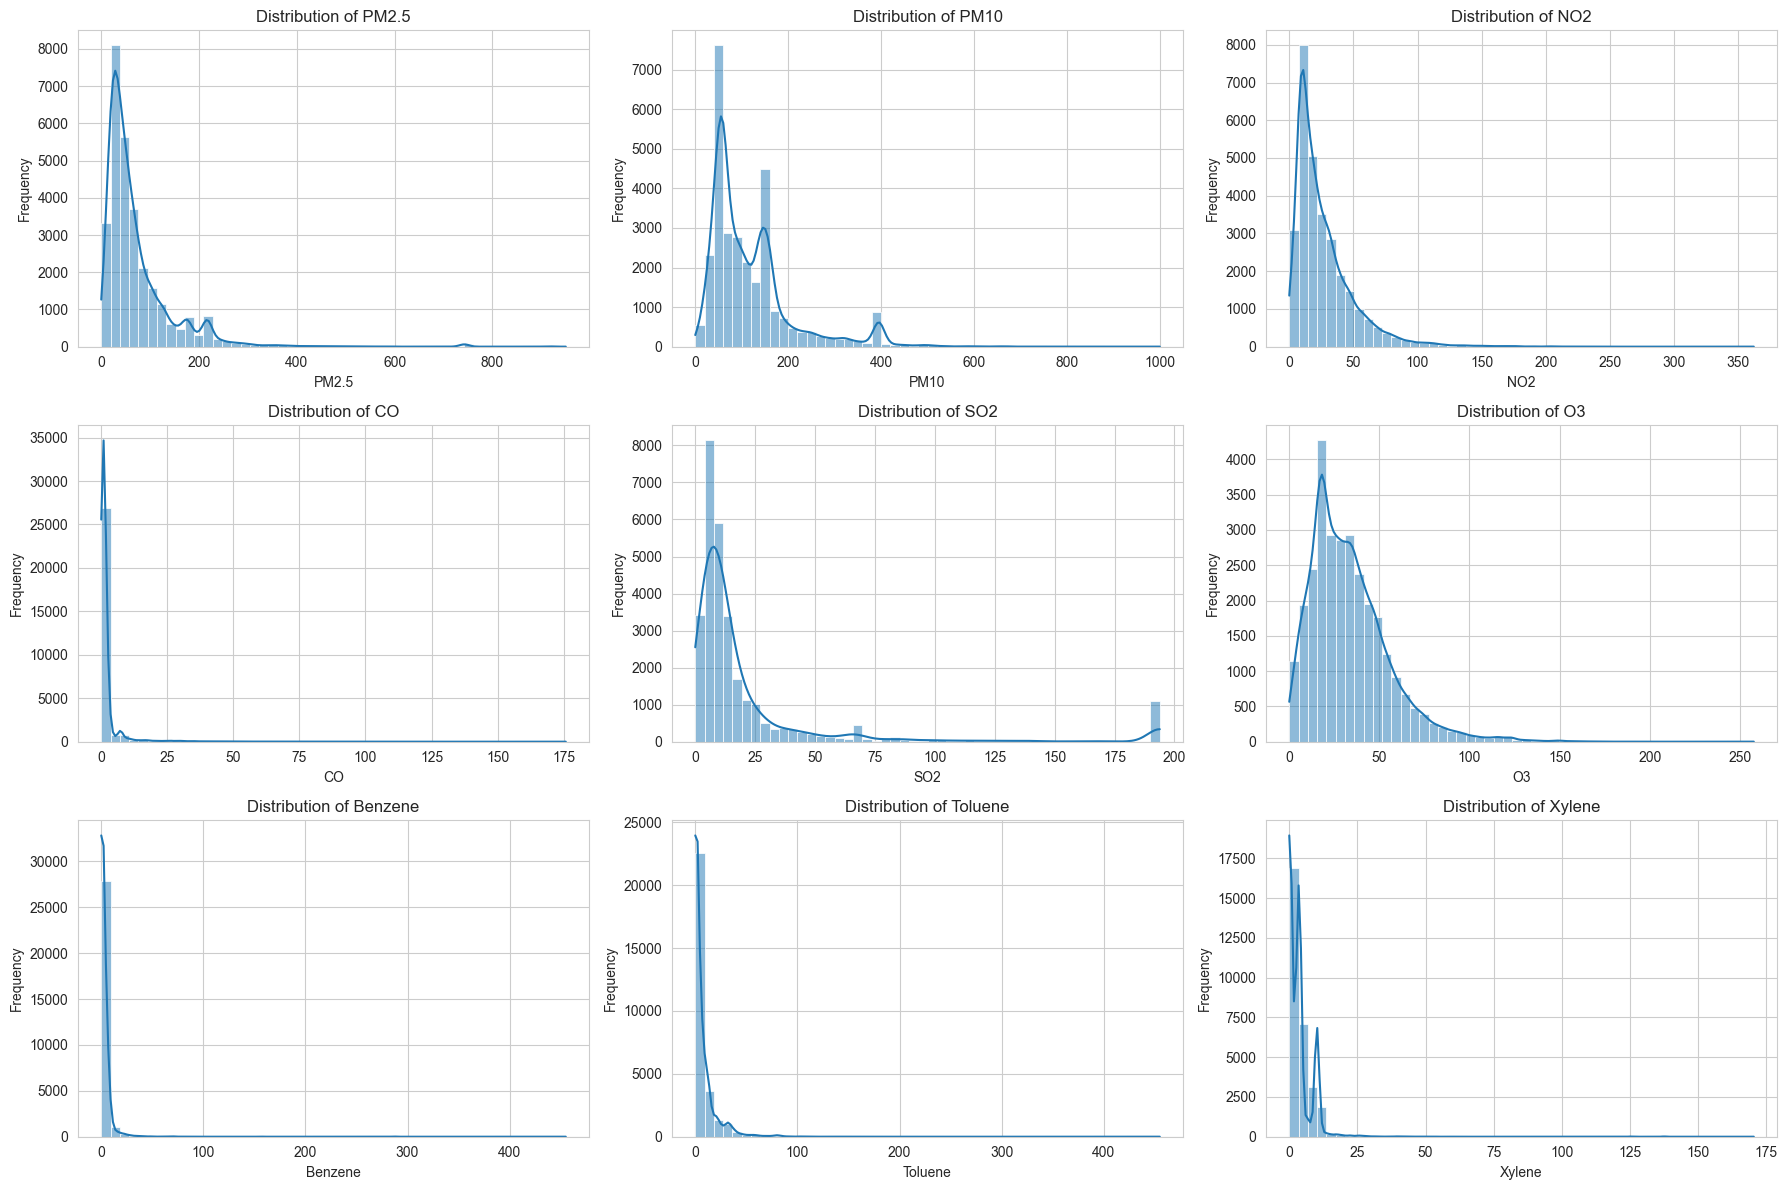

In [8]:
# Select key numerical pollutant columns (excluding 'AQI' for now, focus on raw pollutants)
pollutant_cols = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
# Filter for columns that actually exist in df_cleaned
existing_pollutant_cols = [col for col in pollutant_cols if col in df_cleaned.columns]

plt.figure(figsize=(18, 12))
for i, col in enumerate(existing_pollutant_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_cleaned[col].dropna(), kde=True, bins=50) # dropna for histplot
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


--- Average Pollutant Levels by City (Top 10 Cities for PM2.5) ---
                   PM2.5        PM10        NO2         CO        SO2  \
City                                                                    
Jorapokhar    143.511001  149.144739   8.996407   0.625432  42.126467   
Lucknow       133.476371   58.530000  33.195256   2.126904  12.032111   
Gurugram      121.451257  284.194455  22.731513   1.243288   9.255902   
Patna         120.751216  154.859107  36.033703   1.432099  20.247788   
Delhi         117.101215  233.949716  50.769856   1.976053  16.026446   
Ahmedabad      92.980224  136.119487  47.434689  17.782997  53.282220   
Guwahati       63.860478  116.604900  13.560239   0.734761  14.663127   
Brajrajnagar   62.879350  121.502143  14.780672   1.732186   9.517612   
Talcher        61.402000  165.786389  12.284454   1.909243  29.099978   
Kolkata        61.143624  109.962715  40.120958   0.799251   9.268034   

                     O3    Benzene    Toluene     Xylen

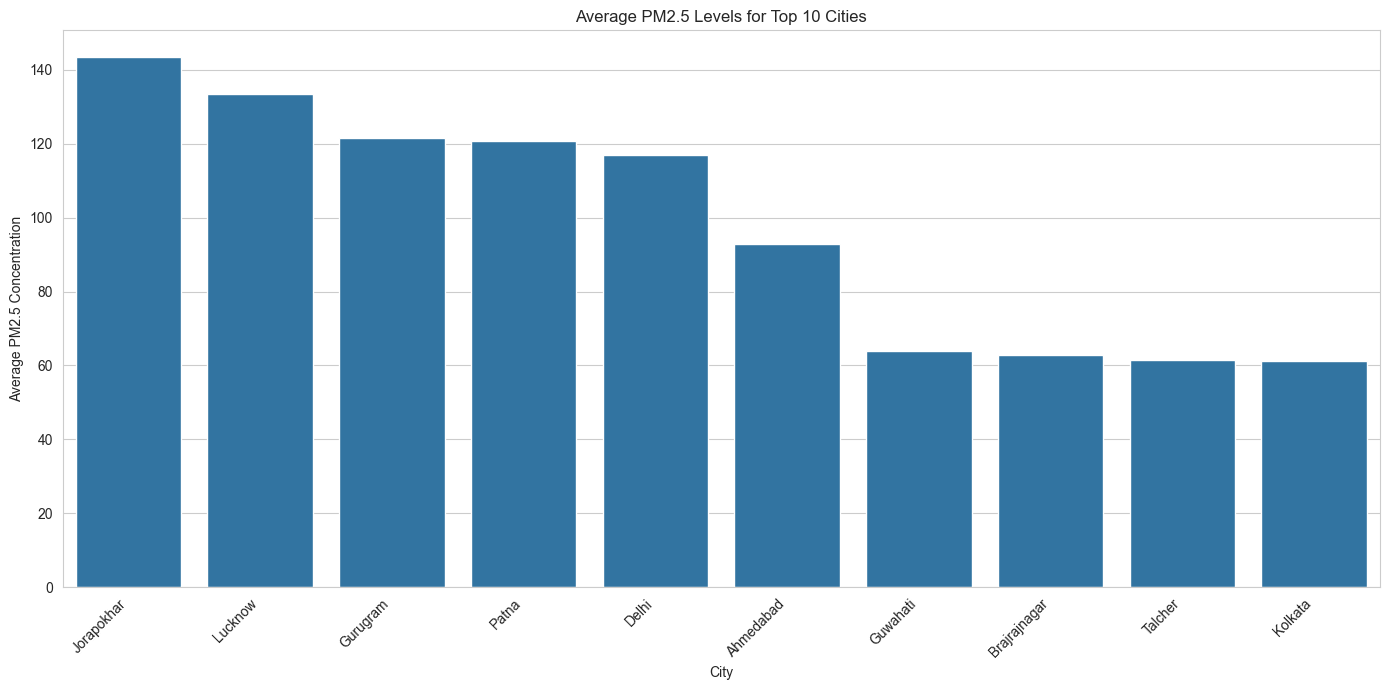

In [9]:
if 'City' in df_cleaned.columns:
    print("\n--- Average Pollutant Levels by City (Top 10 Cities for PM2.5) ---")
    # Calculate mean of key pollutants for each city
    city_avg_pollutants = df_cleaned.groupby('City')[existing_pollutant_cols].mean()

    # Sort by PM2.5 for easier interpretation
    if 'PM2.5' in city_avg_pollutants.columns:
        city_avg_pollutants_sorted = city_avg_pollutants.sort_values(by='PM2.5', ascending=False)
        print(city_avg_pollutants_sorted.head(10)) # Display top 10 for PM2.5

        # Optional: Visualize top N cities for PM2.5
        plt.figure(figsize=(14, 7))
        sns.barplot(x=city_avg_pollutants_sorted.head(10).index, y='PM2.5', data=city_avg_pollutants_sorted.head(10))
        plt.title('Average PM2.5 Levels for Top 10 Cities')
        plt.xlabel('City')
        plt.ylabel('Average PM2.5 Concentration')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("PM2.5 column not found for city-wise average.")
else:
    print("No 'City' column found for city-wise analysis.")

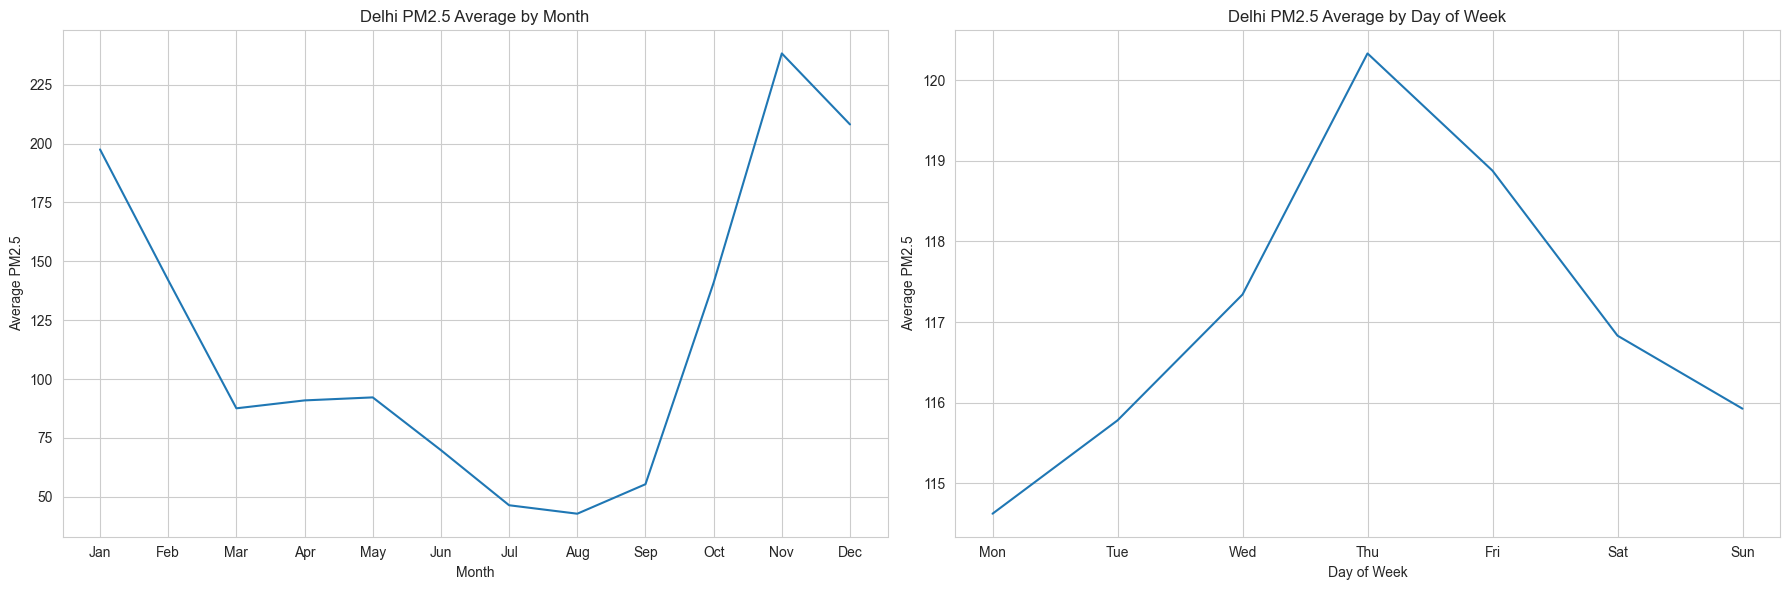

In [11]:
# Ensure 'Date' is index, which was done in Cell 5
# Extract time features if not already present
if not 'Month' in df_cleaned.columns:
    df_cleaned['Month'] = df_cleaned.index.month
if not 'DayOfWeek' in df_cleaned.columns:
    df_cleaned['DayOfWeek'] = df_cleaned.index.dayofweek # Monday=0, Sunday=6

# Example: PM2.5 levels by Month and Day of Week for Delhi
if 'City' in df_cleaned.columns:
    delhi_df_cleaned = df_cleaned[df_cleaned['City'] == 'Delhi'].copy()

    if not delhi_df_cleaned.empty:
        plt.figure(figsize=(18, 6))

        plt.subplot(1, 2, 1)
        sns.lineplot(x='Month', y='PM2.5', data=delhi_df_cleaned, estimator='mean', errorbar=None)
        plt.title('Delhi PM2.5 Average by Month')
        plt.xlabel('Month')
        plt.ylabel('Average PM2.5')
        plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

        plt.subplot(1, 2, 2)
        sns.lineplot(x='DayOfWeek', y='PM2.5', data=delhi_df_cleaned, estimator='mean', errorbar=None)
        plt.title('Delhi PM2.5 Average by Day of Week')
        plt.xlabel('Day of Week')
        plt.ylabel('Average PM2.5')
        plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

        plt.tight_layout()
        plt.show()
    else:
        print("No cleaned Delhi data for seasonal analysis.")
else:
    print("No 'City' column found for time-based analysis.")

In [12]:
# Ensure 'Date' is the index, if not, re-run relevant previous cells
if not df_cleaned.index.name == 'Date':
    print("Warning: 'Date' is not the index. Please ensure previous steps ran correctly.")
    # Attempt to set index if 'Date' column exists
    if 'Date' in df_cleaned.columns:
        df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
        df_cleaned.set_index('Date', inplace=True)
        print("Set 'Date' as index.")
    else:
        print("Error: 'Date' column not found to set as index.")

# Extract time-based features
df_cleaned['Year'] = df_cleaned.index.year
df_cleaned['Quarter'] = df_cleaned.index.quarter
df_cleaned['Month'] = df_cleaned.index.month
df_cleaned['Day'] = df_cleaned.index.day
df_cleaned['DayOfWeek'] = df_cleaned.index.dayofweek # Monday=0, Sunday=6
df_cleaned['DayOfYear'] = df_cleaned.index.dayofyear
df_cleaned['WeekOfYear'] = df_cleaned.index.isocalendar().week.astype(int) # Using isocalendar for ISO week number
df_cleaned['Hour'] = df_cleaned.index.hour # If city_hour.csv was merged, this would be relevant

print("Time-based features extracted:")
print(df_cleaned[['Year', 'Quarter', 'Month', 'Day', 'DayOfWeek', 'DayOfYear', 'WeekOfYear']].head())

Time-based features extracted:
            Year  Quarter  Month  Day  DayOfWeek  DayOfYear  WeekOfYear
Date                                                                   
2015-01-01  2015        1      1    1          3          1           1
2015-01-02  2015        1      1    2          4          2           1
2015-01-03  2015        1      1    3          5          3           1
2015-01-04  2015        1      1    4          6          4           1
2015-01-05  2015        1      1    5          0          5           2


In [13]:
# Pollutants for which to create lagged features
pollutants_to_lag = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3'] # You can add others like Benzene etc.

# Apply lagged features grouped by 'City'
# Using df_cleaned as it has imputed values
for pollutant in pollutants_to_lag:
    if pollutant in df_cleaned.columns and 'City' in df_cleaned.columns:
        df_cleaned[f'{pollutant}_lag1'] = df_cleaned.groupby('City')[pollutant].shift(1)
        df_cleaned[f'{pollutant}_lag7'] = df_cleaned.groupby('City')[pollutant].shift(7) # Previous week
    elif pollutant in df_cleaned.columns: # If no City column, apply globally
        df_cleaned[f'{pollutant}_lag1'] = df_cleaned[pollutant].shift(1)
        df_cleaned[f'{pollutant}_lag7'] = df_cleaned[pollutant].shift(7)
    else:
        print(f"Warning: Pollutant '{pollutant}' not found in DataFrame for lagging.")

print("\nLagged features created. Displaying head with new columns:")
print(df_cleaned.head())

# Check for new missing values introduced by lagging (first few rows for each city will have NaNs)
print("\nMissing values after creating lagged features:")
print(df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0])



Lagged features created. Displaying head with new columns:
            PM2.5    PM10     NO    NO2    NOx    NH3     CO    SO2      O3  \
Date                                                                          
2015-01-01  73.24  141.54   0.92  18.22  17.15  26.64   0.92  27.64  133.36   
2015-01-02  73.24  141.54   0.97  15.69  16.46  26.64   0.97  24.55   34.06   
2015-01-03  73.24  141.54  17.40  19.30  29.70  26.64  17.40  29.07   30.70   
2015-01-04  73.24  141.54   1.70  18.48  17.97  26.64   1.70  18.59   36.08   
2015-01-05  73.24  141.54  22.10  21.42  37.76  26.64  22.10  39.33   39.31   

            Benzene  ...  PM10_lag1  PM10_lag7  NO2_lag1 NO2_lag7  CO_lag1  \
Date                 ...                                                     
2015-01-01     0.00  ...        NaN        NaN       NaN      NaN      NaN   
2015-01-02     3.68  ...     141.54        NaN     18.22      NaN     0.92   
2015-01-03     6.80  ...     141.54        NaN     15.69      NaN     0.97

In [14]:
# For the purpose of moving forward, let's drop rows that still have NaNs
# This is a simple approach, for production, consider more sophisticated imputation (e.g., mean/median for relevant periods)

initial_rows = df_cleaned.shape[0]
df_final = df_cleaned.dropna() # Drop any rows that still contain NaN values after feature engineering
final_rows = df_final.shape[0]

print(f"Initial rows before final NaN drop: {initial_rows}")
print(f"Final rows after dropping NaNs: {final_rows}")
print(f"Number of rows dropped: {initial_rows - final_rows}")

print("\n--- Final Cleaned DataFrame Information (after feature engineering and final NaN drop) ---")
df_final.info()

print("\n--- Missing values check on df_final ---")
print(df_final.isnull().sum().sum()) # Should be 0


Initial rows before final NaN drop: 29531
Final rows after dropping NaNs: 29349
Number of rows dropped: 182

--- Final Cleaned DataFrame Information (after feature engineering and final NaN drop) ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29349 entries, 2015-01-08 to 2020-07-01
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       29349 non-null  float64
 1   PM10        29349 non-null  float64
 2   NO          29349 non-null  float64
 3   NO2         29349 non-null  float64
 4   NOx         29349 non-null  float64
 5   NH3         29349 non-null  float64
 6   CO          29349 non-null  float64
 7   SO2         29349 non-null  float64
 8   O3          29349 non-null  float64
 9   Benzene     29349 non-null  float64
 10  Toluene     29349 non-null  float64
 11  Xylene      29349 non-null  float64
 12  AQI         29349 non-null  float64
 13  City        29349 non-null  object 
 14  Month       2

In [15]:
# Define target variable (y)
target_variable = 'PM2.5' # Or AQI if you plan to predict that

# Define features (X)
# Exclude the original target variable, and any intermediate columns or the 'City' string itself for now
# We'll handle 'City' encoding separately if doing a multi-city model
features = [col for col in df_final.columns if col not in ['City', 'AQI', target_variable] and '_lag' in col or col in ['Year', 'Quarter', 'Month', 'Day', 'DayOfWeek', 'DayOfYear', 'WeekOfYear']]

# Add other non-lagged pollutant columns as features, excluding the target and AQI
for p in ['PM10', 'NO2', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']:
    if p != target_variable and p in df_final.columns:
        features.append(p)

# Remove duplicates from features list and maintain order if needed (set and back to list)
features = list(dict.fromkeys(features))

X = df_final[features]
y = df_final[target_variable]

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print("\nFirst 5 rows of Features (X):")
print(X.head())
print("\nFirst 5 rows of Target (y):")
print(y.head())

# Important: If you plan to build a single model for all cities, you'll need to one-hot encode the 'City' column
# If you plan to build a separate model for each city, you would filter df_final by city first.



Features (X) shape: (29349, 27)
Target (y) shape: (29349,)

First 5 rows of Features (X):
            Month  DayOfWeek  Year  Quarter  Day  DayOfYear  WeekOfYear  \
Date                                                                      
2015-01-08      1          3  2015        1    8          8           2   
2015-01-09      1          4  2015        1    9          9           2   
2015-01-10      1          5  2015        1   10         10           2   
2015-01-11      1          6  2015        1   11         11           2   
2015-01-12      1          0  2015        1   12         12           3   

            PM2.5_lag1  PM2.5_lag7  PM10_lag1  ...  O3_lag1  O3_lag7    PM10  \
Date                                           ...                             
2015-01-08       73.24       73.24     141.54  ...    33.47   133.36  141.54   
2015-01-09       73.24       73.24     141.54  ...    31.89    34.06  141.54   
2015-01-10       73.24       73.24     141.54  ...    25.75    

In [16]:
from sklearn.model_selection import train_test_split

# Assuming df_final is ready from Cell 13 and X, y from Cell 14
# For time series, we split chronologically. Let's use a specific date for splitting.
# You might need to adjust this date based on the actual date range of your data.
# A common practice is to use the last 1-2 years for testing.
split_date = '2019-01-01' # Example split date, adjust based on your data's end date

# Ensure the index is datetime and sorted
df_final = df_final.sort_index()

# Split X and y
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

print(f"Training data size: {X_train.shape[0]} samples")
print(f"Testing data size: {X_test.shape[0]} samples")
print(f"First date in training set: {X_train.index.min()}")
print(f"Last date in training set: {X_train.index.max()}")
print(f"First date in testing set: {X_test.index.min()}")
print(f"Last date in testing set: {X_test.index.max()}")

Training data size: 17313 samples
Testing data size: 12036 samples
First date in training set: 2015-01-08 00:00:00
Last date in training set: 2018-12-31 00:00:00
First date in testing set: 2019-01-01 00:00:00
Last date in testing set: 2020-07-01 00:00:00


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Random Forest Regressor model
# You can tune parameters later, but let's start with some reasonable defaults
# random_state for reproducibility
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores

print("Training the model...")
# Train the model on the training data
model.fit(X_train, y_train)
print("Model training complete!")


Training the model...
Model training complete!


In [18]:
print("Making predictions on the test set...")
# Make predictions
y_pred = model.predict(X_test)
print("Predictions made.")

# It's useful to put predictions into a DataFrame with dates for easier plotting
y_pred_series = pd.Series(y_pred, index=X_test.index, name='Predicted_PM2.5')


Making predictions on the test set...
Predictions made.


In [19]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

Mean Absolute Error (MAE): 10.68
Mean Squared Error (MSE): 449.27
Root Mean Squared Error (RMSE): 21.20
R-squared (R2 Score): 0.80


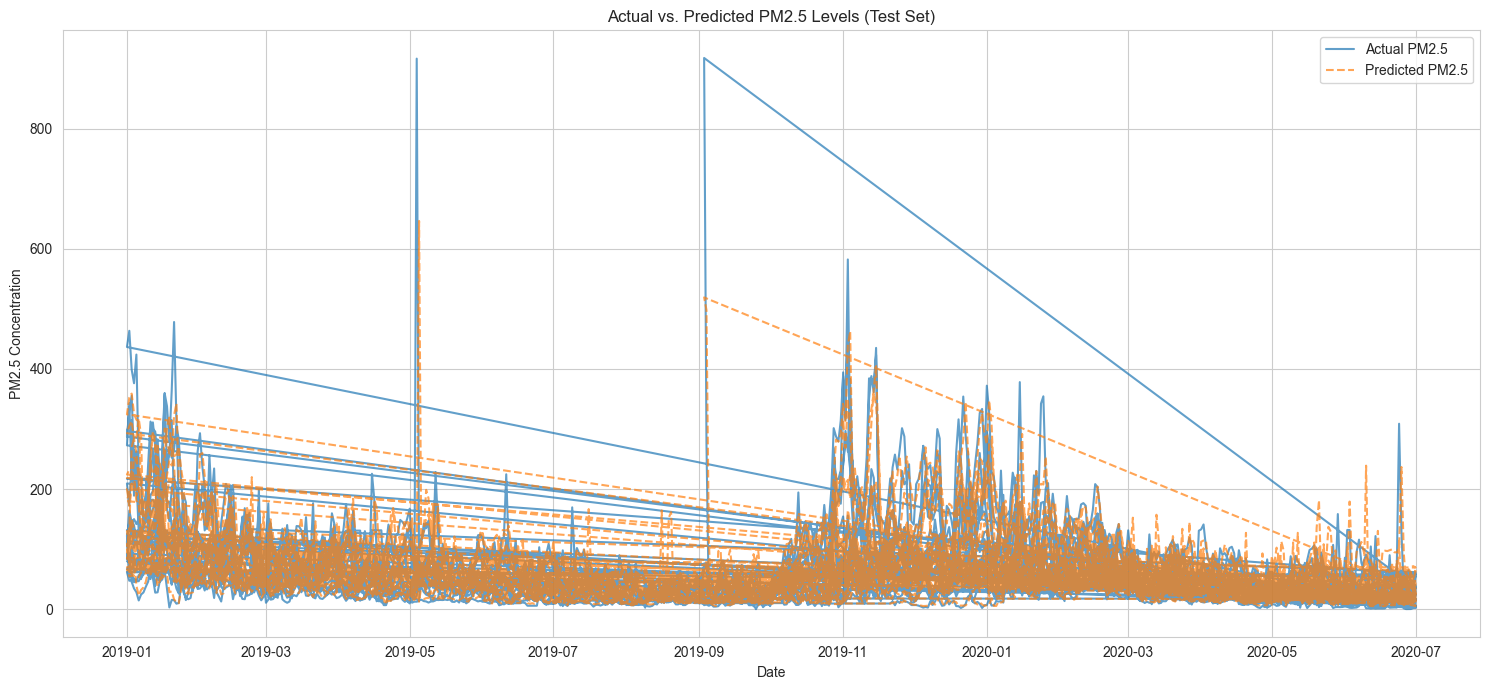

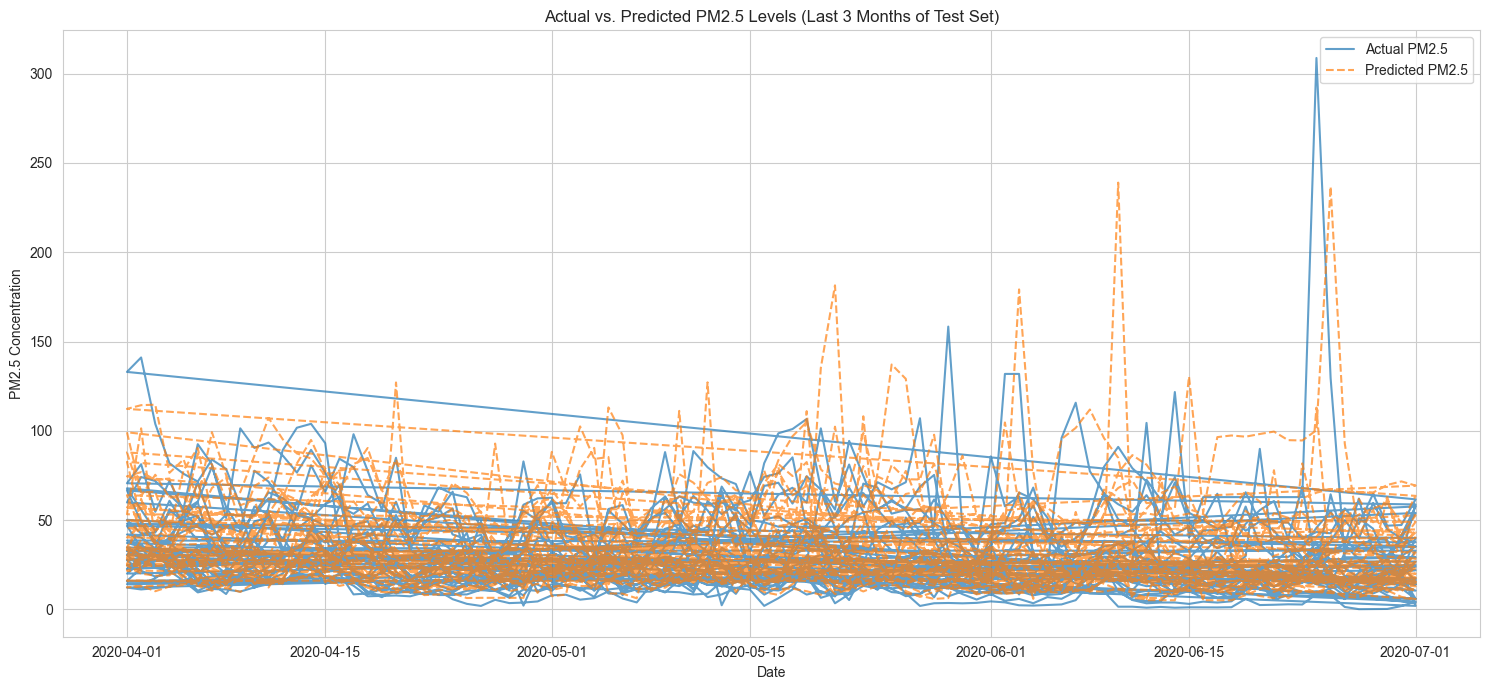

In [20]:
# Plot actual vs. predicted values for a subset of data (e.g., last few months of test data)
plt.figure(figsize=(15, 7))
plt.plot(y_test.index, y_test, label='Actual PM2.5', alpha=0.7)
plt.plot(y_pred_series.index, y_pred_series, label='Predicted PM2.5', alpha=0.7, linestyle='--')
plt.title('Actual vs. Predicted PM2.5 Levels (Test Set)')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Zoom in on a specific period, e.g., the last 3 months
# Ensure your split_date allows for enough test data for this
if not X_test.empty:
    last_3_months_start = X_test.index.max() - pd.DateOffset(months=3)
    plt.figure(figsize=(15, 7))
    plt.plot(y_test[y_test.index >= last_3_months_start].index, y_test[y_test.index >= last_3_months_start], label='Actual PM2.5', alpha=0.7)
    plt.plot(y_pred_series[y_pred_series.index >= last_3_months_start].index, y_pred_series[y_pred_series.index >= last_3_months_start], label='Predicted PM2.5', alpha=0.7, linestyle='--')
    plt.title('Actual vs. Predicted PM2.5 Levels (Last 3 Months of Test Set)')
    plt.xlabel('Date')
    plt.ylabel('PM2.5 Concentration')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Test set is empty, cannot plot specific period.")
    


--- Top 10 Feature Importances ---
PM2.5_lag1    0.824232
PM2.5_lag7    0.028179
CO            0.018372
PM10          0.013153
SO2_lag7      0.010076
SO2           0.009711
O3            0.007694
DayOfYear     0.007251
Benzene       0.006850
NO2           0.006784
dtype: float64


C:\Users\acer\AppData\Local\Temp\ipykernel_14208\1857364183.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_sorted.head(10).values, y=feature_importances_sorted.head(10).index, palette='viridis')


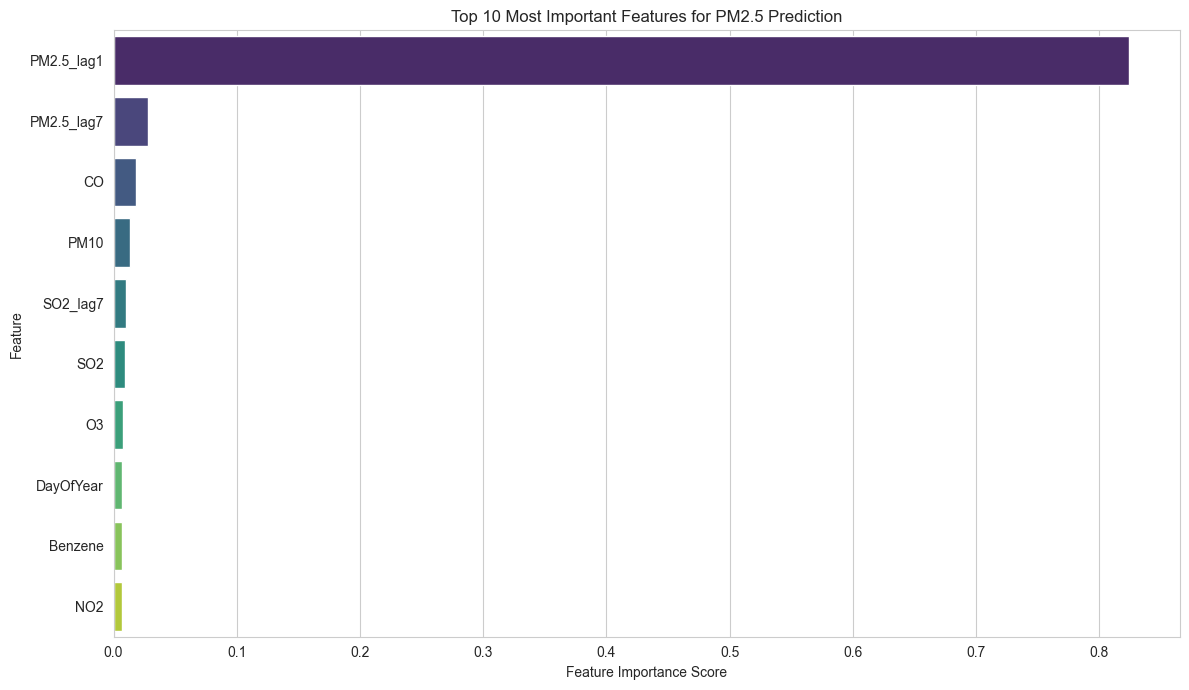

In [21]:
# Check if the model has feature_importances_ attribute
if hasattr(model, 'feature_importances_'):
    # Get feature importances from the trained Random Forest model
    feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

    # Sort them for better visualization
    feature_importances_sorted = feature_importances.sort_values(ascending=False)

    print("\n--- Top 10 Feature Importances ---")
    print(feature_importances_sorted.head(10))

    # Visualize feature importances
    plt.figure(figsize=(12, 7))
    sns.barplot(x=feature_importances_sorted.head(10).values, y=feature_importances_sorted.head(10).index, palette='viridis')
    plt.title('Top 10 Most Important Features for PM2.5 Prediction')
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print("Model does not have 'feature_importances_' attribute. This is common for non-tree-based models.")
    

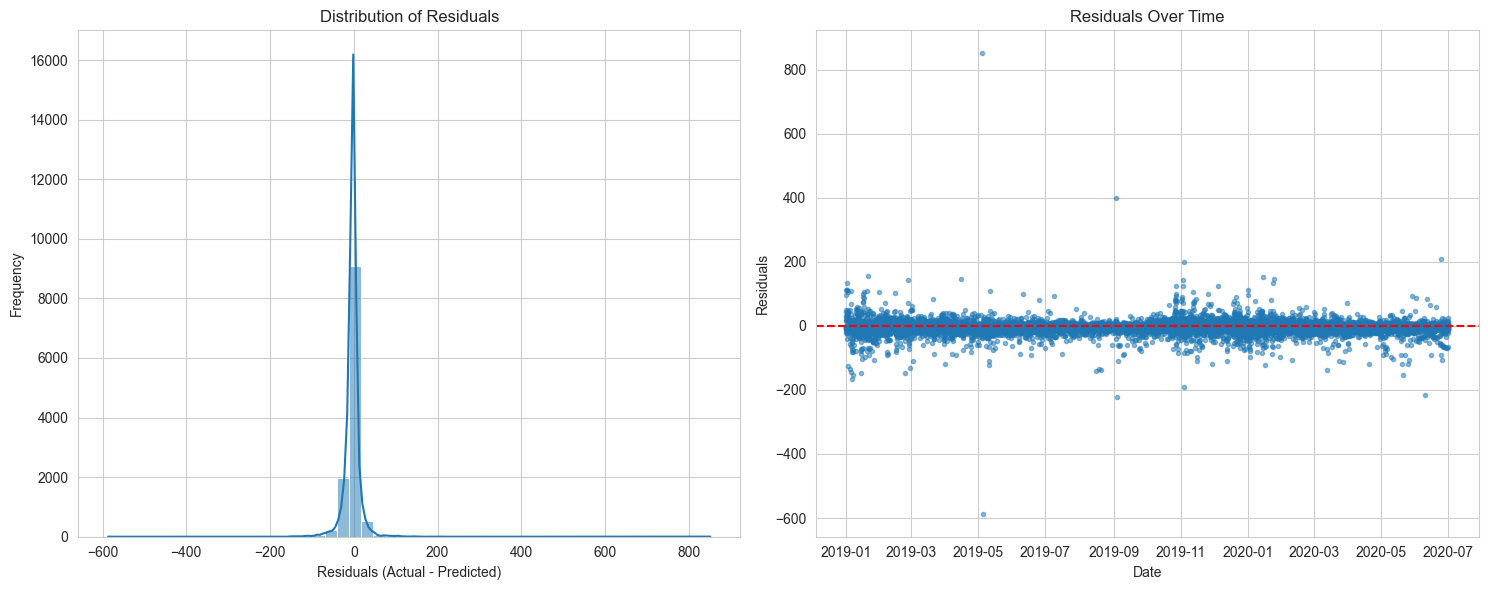


--- Basic Statistics of Residuals ---
count    12036.000000
mean        -3.443830
std         20.915336
min       -586.536900
25%         -8.601875
50%         -2.249200
75%          2.643400
max        851.549400
dtype: float64


In [22]:
# Calculate residuals
residuals = y_test - y_pred_series

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=50)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
# Plot residuals over time
plt.plot(residuals.index, residuals, marker='.', linestyle='None', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

print("\n--- Basic Statistics of Residuals ---")
print(residuals.describe())


In [ ]:
from sklearn.model_selection import GridSearchCV

print("Starting Hyperparameter Tuning (this may take a while)...")

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200], # Number of trees in the forest
    'max_depth': [10, 20, None],   # Maximum depth of the tree (None means unlimited)
    'min_samples_split': [2, 5, 10] # Minimum number of samples required to split an internal node
}

# Initialize GridSearchCV
# cv=3 means 3-fold cross-validation
# scoring='neg_mean_squared_error' is common for regression; GridSearchCV maximizes score, so we negate MSE.
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error',
                           verbose=1,
                           n_jobs=-1) # Use all cores for GridSearchCV too

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("\nBest parameters found:")
print(grid_search.best_params_)

print("\nBest RMSE on validation set during tuning:")
best_rmse_tuned = np.sqrt(abs(grid_search.best_score_)) # Convert negative MSE back to RMSE
print(f"{best_rmse_tuned:.2f}")

# Use the best estimator to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Evaluate the best model
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

print("\n--- Performance of Tuned Model on Test Set ---")
print(f"Mean Absolute Error (MAE): {mae_tuned:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned:.2f}")
print(f"R-squared (R2 Score): {r2_tuned:.2f}")


Starting Hyperparameter Tuning (this may take a while)...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
